Formula 1 Data Analysis

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Load data
circuits_df = pd.read_csv('./f1-1950-2023/circuits.csv')
drivers_df = pd.read_csv('./f1-1950-2023/drivers.csv')
driver_standings_df = pd.read_csv('./f1-1950-2023/driver_standings.csv')
lap_times_df = pd.read_csv('./f1-1950-2023/lap_times.csv')
races_df = pd.read_csv('./f1-1950-2023/races.csv')
results_df = pd.read_csv('./f1-1950-2023/results.csv')
seasons_df = pd.read_csv('./f1-1950-2023/seasons.csv')
constructors_df = pd.read_csv('./f1-1950-2023/constructors.csv')
constructor_standings_df = pd.read_csv('./f1-1950-2023/constructor_standings.csv')


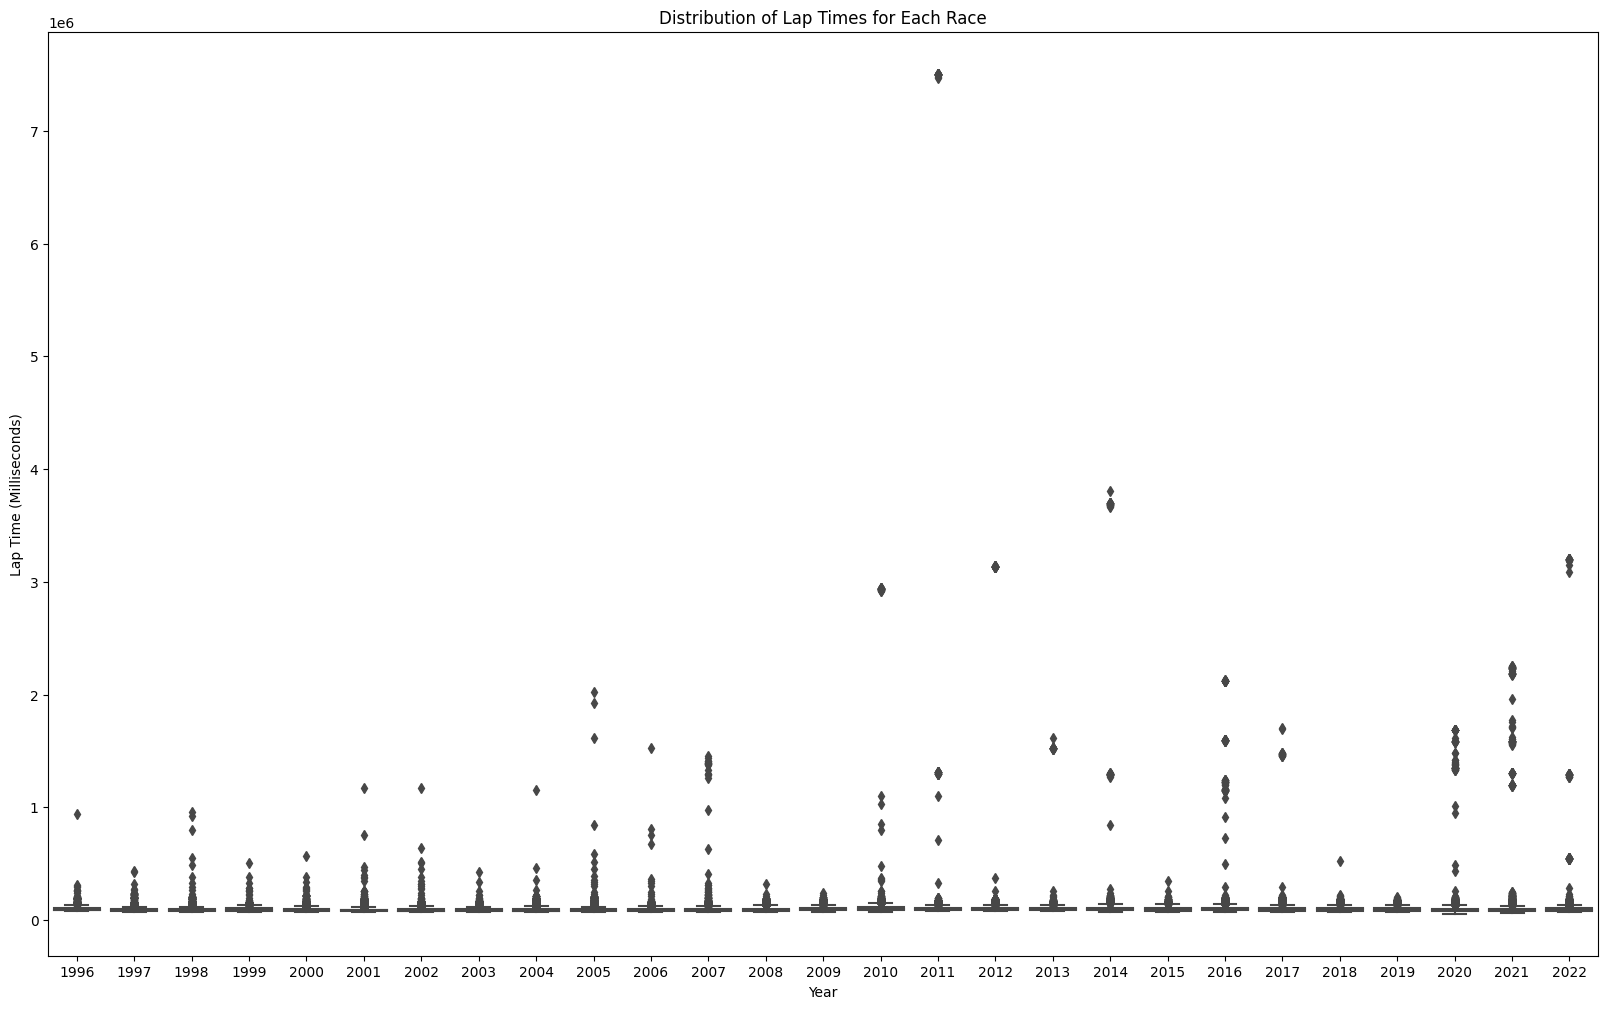

In [4]:
# Load the lap_times dataframe
lap_times_df = pd.read_csv('./f1-1950-2023/lap_times.csv')

# Merge the lap_times and races dataframes
merged_df = pd.merge(lap_times_df, races_df, on='raceId')

# Create a box plot to visualize the distribution of lap times for each race
plt.figure(figsize=(20, 12))
sns.boxplot(x='year', y='milliseconds', data=merged_df, palette='coolwarm')
plt.title('Distribution of Lap Times for Each Race')
plt.xlabel('Year')
plt.ylabel('Lap Time (Milliseconds)')
plt.show()


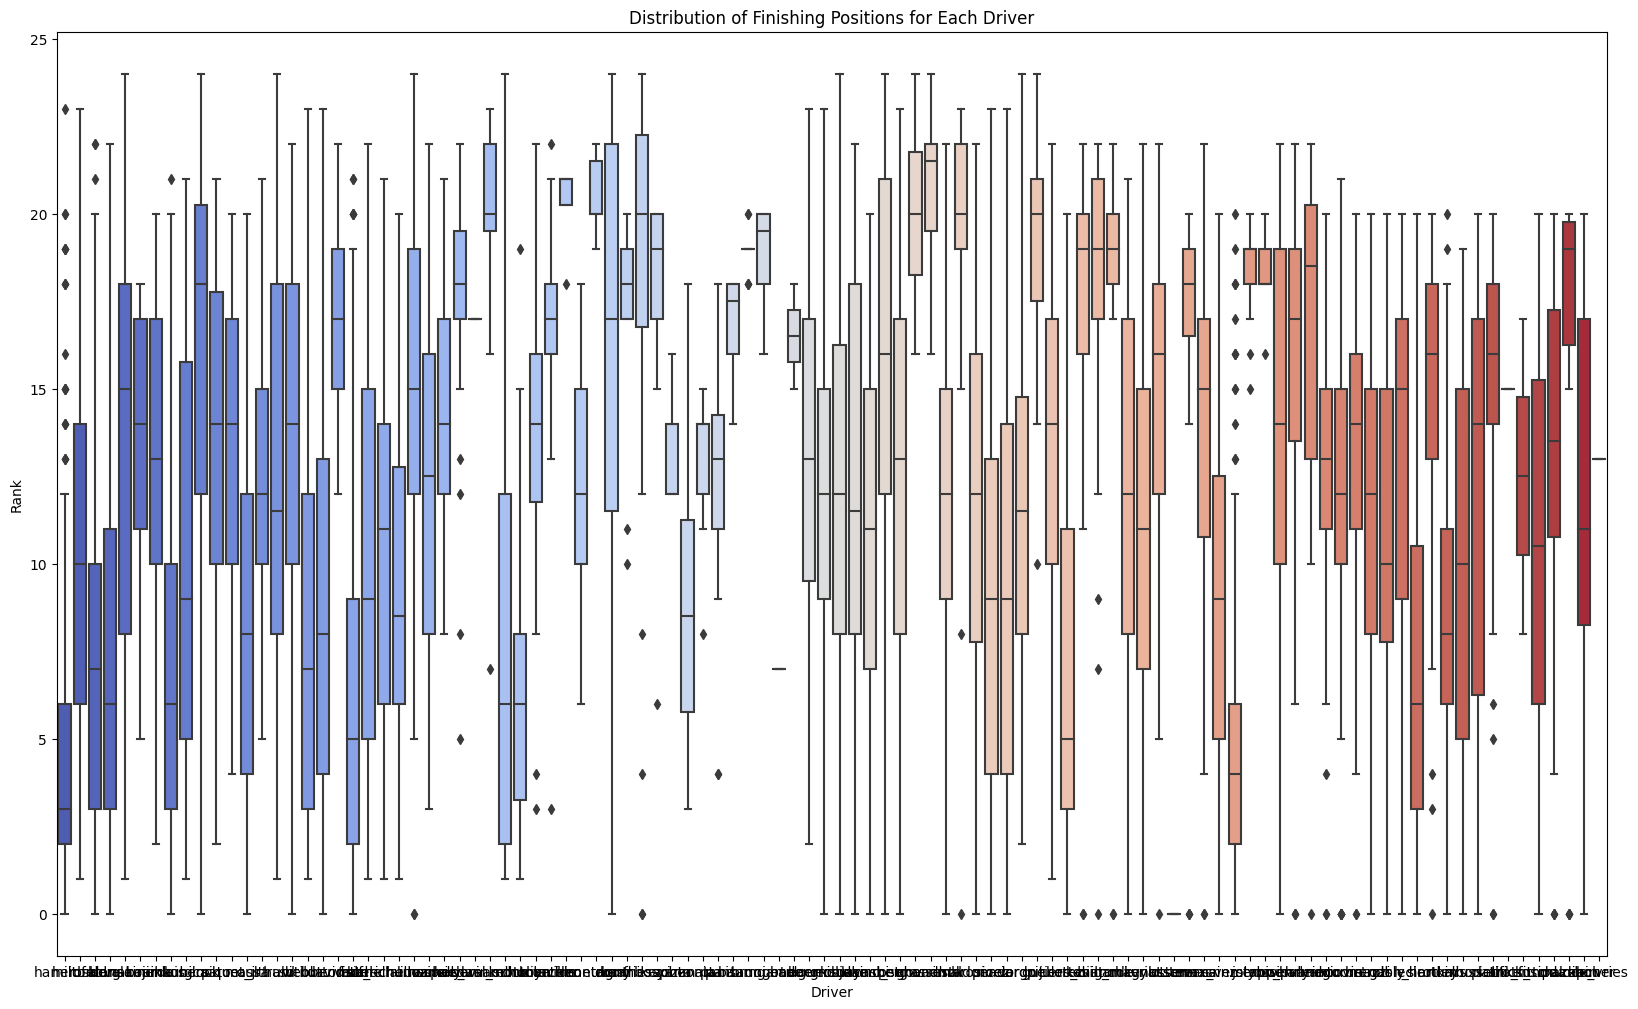

In [19]:
# Load the results and drivers dataframes
results_df = pd.read_csv('./f1-1950-2023/results.csv')
drivers_df = pd.read_csv('./f1-1950-2023/drivers.csv')

# Merge the results and drivers dataframes
merged_df = pd.merge(results_df, drivers_df, on='driverId')

# Remove the missing values from the rank column
merged_df = merged_df[merged_df['rank'] != '\\N']

# Convert the position column to numeric
merged_df['rank'] = pd.to_numeric(merged_df['rank'])

# Create a box plot to visualize the distribution of finishing positions for each driver
plt.figure(figsize=(20, 12))
sns.boxplot(x='driverRef', y='rank', data=merged_df, palette='coolwarm')
plt.title('Distribution of Finishing Positions for Each Driver')
plt.xlabel('Driver')
plt.ylabel('Rank')
plt.show()


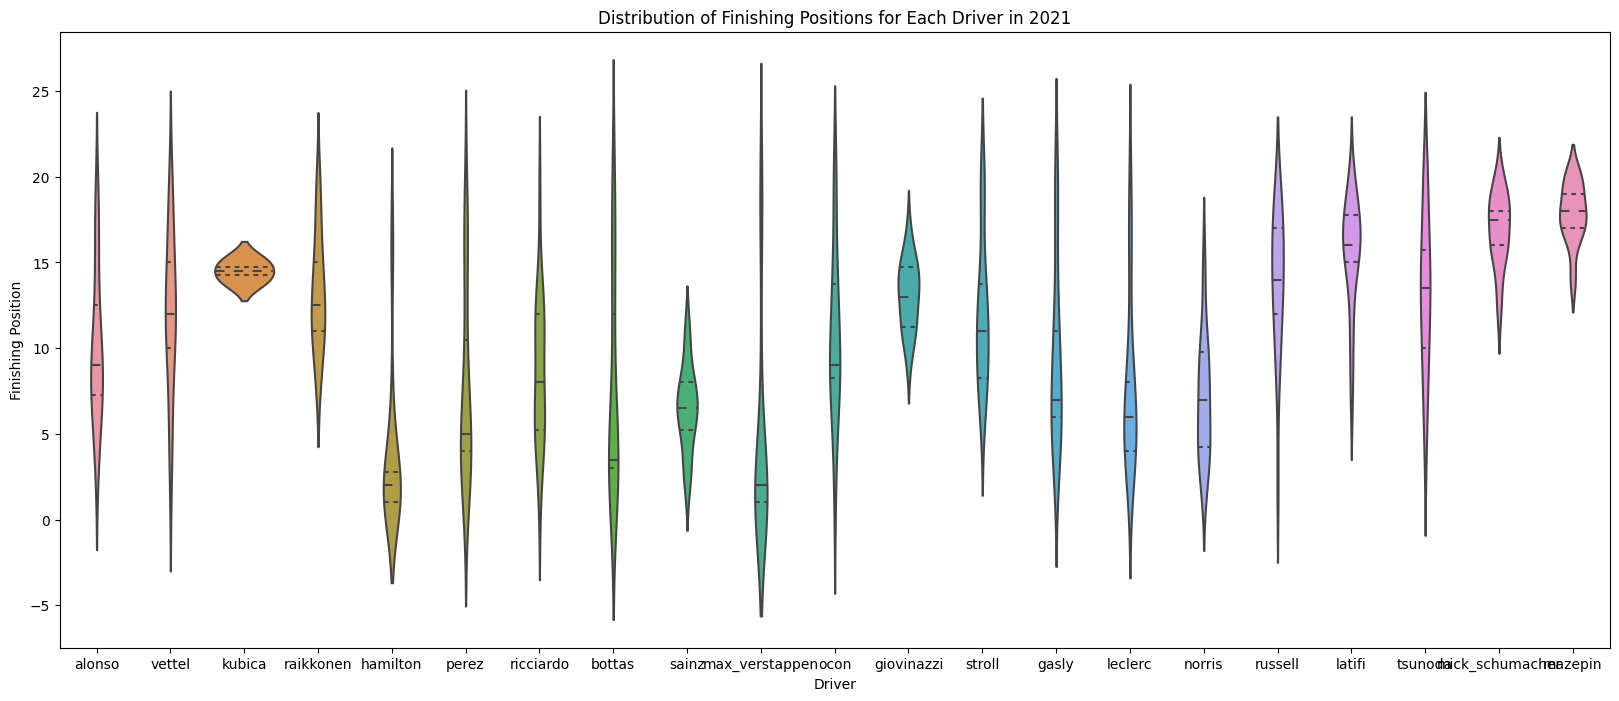

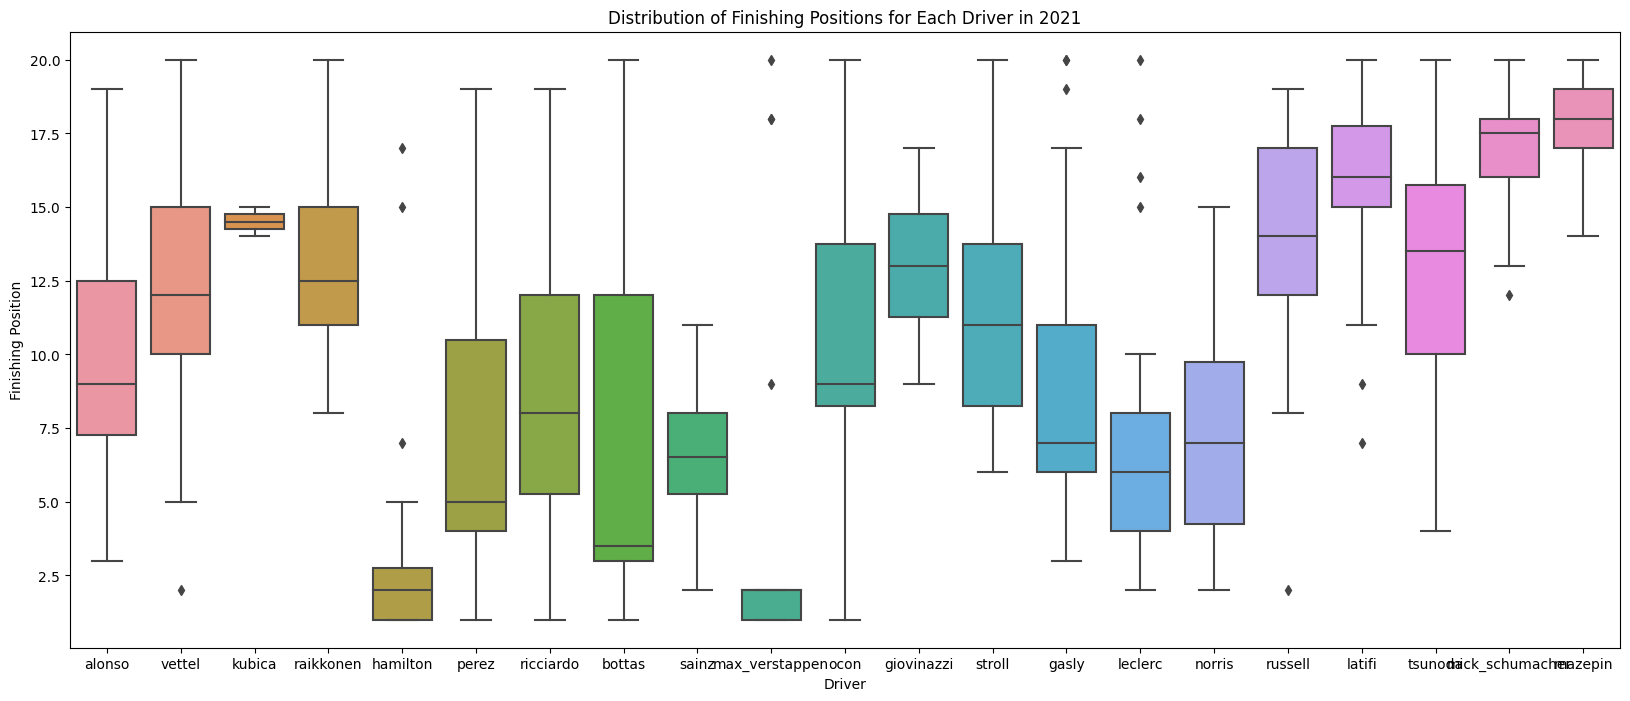

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the races, results, and drivers dataframes
races_df = pd.read_csv('./f1-1950-2023/races.csv')
results_df = pd.read_csv('./f1-1950-2023/results.csv')
drivers_df = pd.read_csv('./f1-1950-2023/drivers.csv')

# Specify the year to visualize
year = 2021

# Merge the races, results, and drivers dataframes
merged_df = pd.merge(races_df, results_df, on='raceId')
merged_df = pd.merge(merged_df, drivers_df, on='driverId')

# Filter the merged dataframe to only include the year of interest
merged_df = merged_df[merged_df['year'] == year]

# Group by driver and calculate the average finishing position
avg_pos_df = merged_df.groupby(['driverId', 'driverRef']).agg(avg_pos=('positionOrder', 'mean')).reset_index()

# Create a violin plot to visualize the distribution of finishing positions for each driver
plt.figure(figsize=(20, 8))
sns.violinplot(x='driverRef', y='positionOrder', data=merged_df, inner='quartile')
plt.title(f'Distribution of Finishing Positions for Each Driver in {year}')
plt.xlabel('Driver')
plt.ylabel('Finishing Position')
plt.show()

# A box plot to visualize the distribution of finishing positions for each driver
plt.figure(figsize=(20, 8))
sns.boxplot(x='driverRef', y='positionOrder', data=merged_df)
plt.title(f'Distribution of Finishing Positions for Each Driver in {year}')
plt.xlabel('Driver')
plt.ylabel('Finishing Position')
plt.show()


/tmp/ipykernel_1879/3741564268.py:30: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  sns.heatmap(pivot_df.loc[:, ('avg_speed', range(2014, 2024))], cmap='coolwarm', linewidths=0.5)


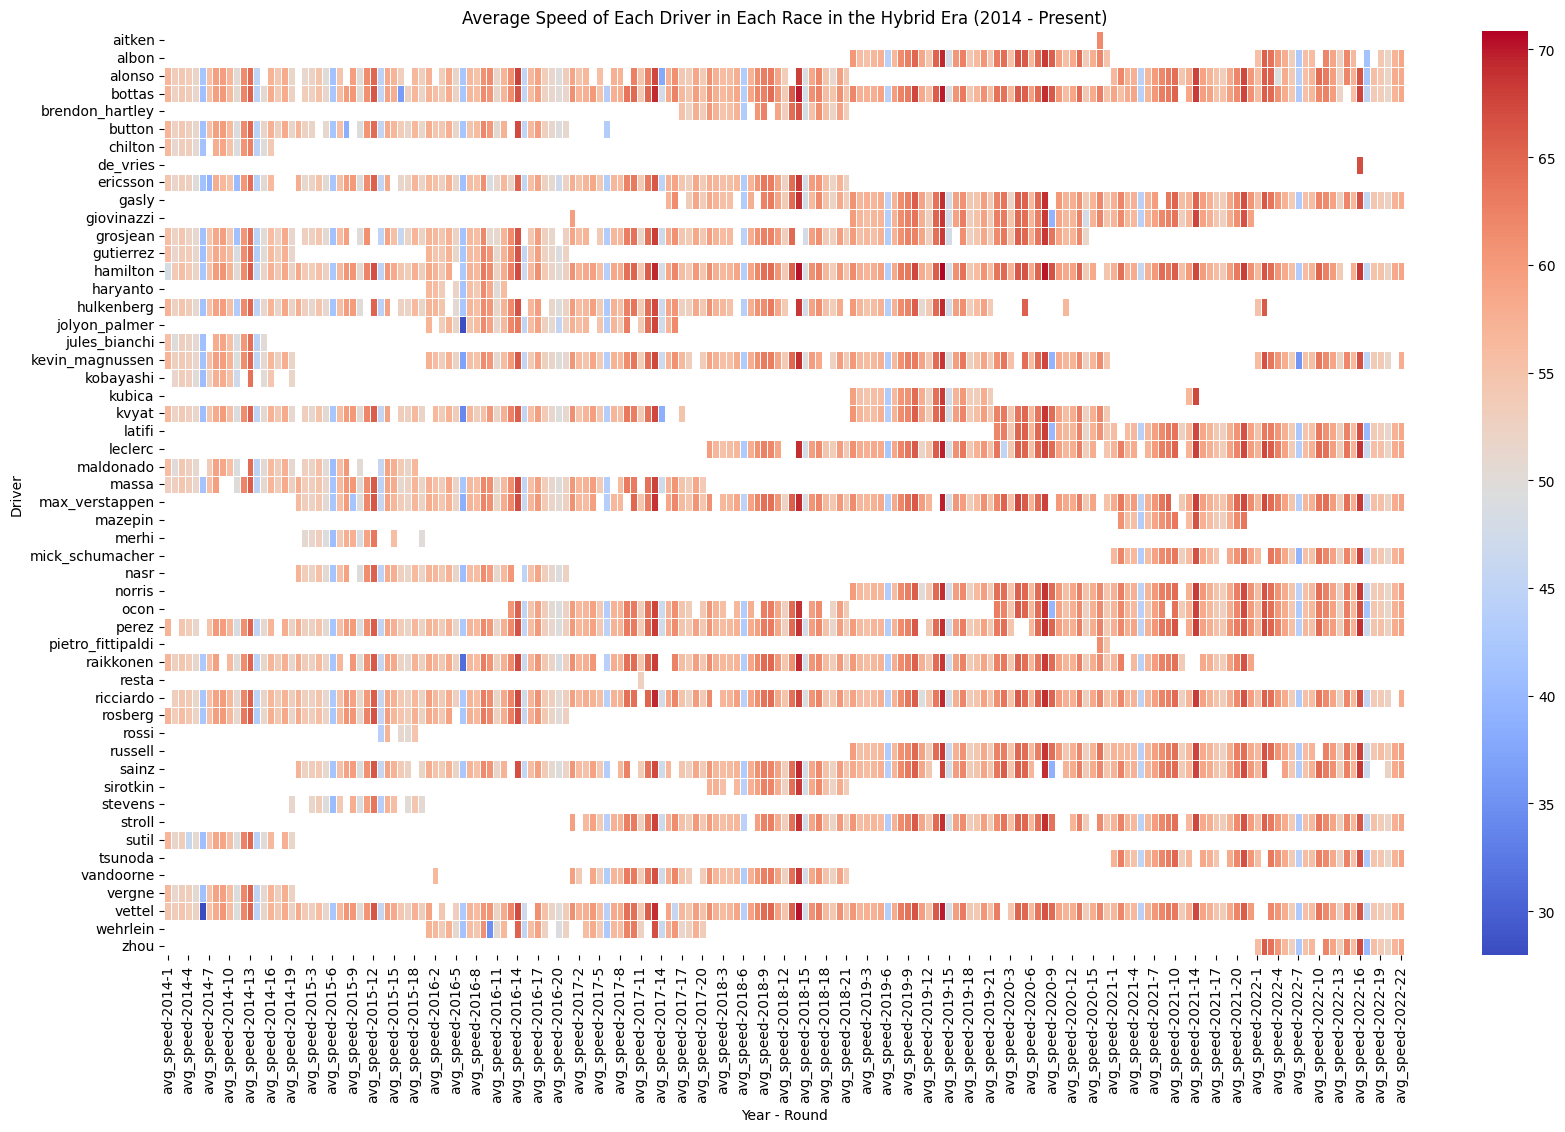

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the races, results, and drivers dataframes
races_df = pd.read_csv('./f1-1950-2023/races.csv')
results_df = pd.read_csv('./f1-1950-2023/results.csv')
drivers_df = pd.read_csv('./f1-1950-2023/drivers.csv')

# Filter races_df to only include races in the hybrid era (2014 - present)
races_df = races_df[races_df['year'] >= 2014]

# Merge the races, results, and drivers dataframes
merged_df = pd.merge(races_df, results_df, on='raceId')
merged_df = pd.merge(merged_df, drivers_df, on='driverId')

# Convert the 'fastestLapSpeed' column to a numeric data type
merged_df['fastestLapSpeed'] = pd.to_numeric(merged_df['fastestLapSpeed'], errors='coerce')

# Filter out any NaN values in the 'fastestLapSpeed' column
merged_df = merged_df.dropna(subset=['fastestLapSpeed'])

# Calculate the average speed of each driver in each race
merged_df['avg_speed'] = merged_df['fastestLapSpeed'] / 3.6
avg_speed_df = merged_df.groupby(['year', 'round', 'raceId', 'driverId', 'driverRef', 'nationality']).agg(avg_speed=('avg_speed', 'mean')).reset_index()

# Create a heatmap to visualize the average speed of each driver in each race
plt.figure(figsize=(20, 12))
pivot_df = avg_speed_df.pivot_table(index=['driverRef'], columns=['year', 'round'], values=['avg_speed'])
sns.heatmap(pivot_df.loc[:, ('avg_speed', range(2014, 2024))], cmap='coolwarm', linewidths=0.5)
plt.title('Average Speed of Each Driver in Each Race in the Hybrid Era (2014 - Present)')
plt.xlabel('Year - Round')
plt.ylabel('Driver')
plt.show()


/tmp/ipykernel_1879/3496854249.py:30: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  sns.heatmap(pivot_df.loc[:, ('avg_speed', range(2014, 2024))], cmap='coolwarm', linewidths=0.5)


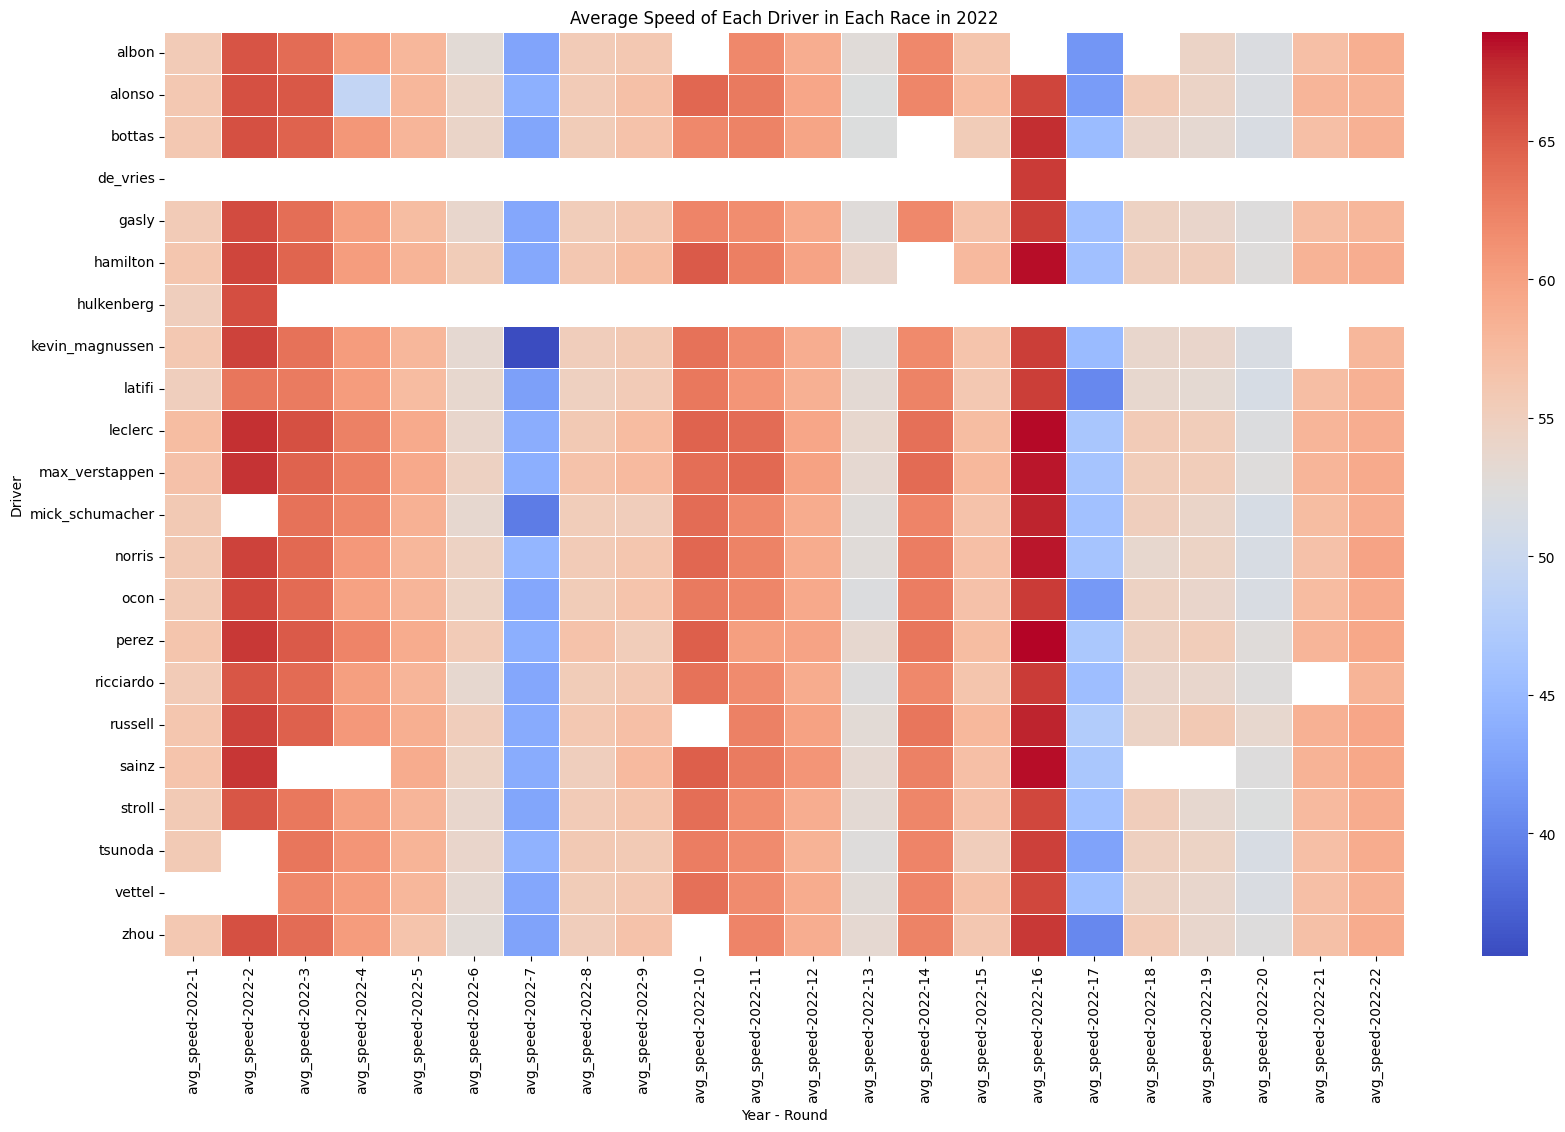

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the races, results, and drivers dataframes
races_df = pd.read_csv('./f1-1950-2023/races.csv')
results_df = pd.read_csv('./f1-1950-2023/results.csv')
drivers_df = pd.read_csv('./f1-1950-2023/drivers.csv')

# Filter races_df to only include races in the hybrid era (2014 - present)
races_df = races_df[races_df['year'] == 2022]

# Merge the races, results, and drivers dataframes
merged_df = pd.merge(races_df, results_df, on='raceId')
merged_df = pd.merge(merged_df, drivers_df, on='driverId')

# Convert the 'fastestLapSpeed' column to a numeric data type
merged_df['fastestLapSpeed'] = pd.to_numeric(merged_df['fastestLapSpeed'], errors='coerce')

# Filter out any NaN values in the 'fastestLapSpeed' column
merged_df = merged_df.dropna(subset=['fastestLapSpeed'])

# Calculate the average speed of each driver in each race
merged_df['avg_speed'] = merged_df['fastestLapSpeed'] / 3.6
avg_speed_df = merged_df.groupby(['year', 'round', 'raceId', 'driverId', 'driverRef', 'nationality']).agg(avg_speed=('avg_speed', 'mean')).reset_index()

# Create a heatmap to visualize the average speed of each driver in each race
plt.figure(figsize=(20, 12))
pivot_df = avg_speed_df.pivot_table(index=['driverRef'], columns=['year', 'round'], values=['avg_speed'])
sns.heatmap(pivot_df.loc[:, ('avg_speed', range(2014, 2024))], cmap='coolwarm', linewidths=0.5)
plt.title('Average Speed of Each Driver in Each Race in 2022')
plt.xlabel('Year - Round')
plt.ylabel('Driver')
plt.show()


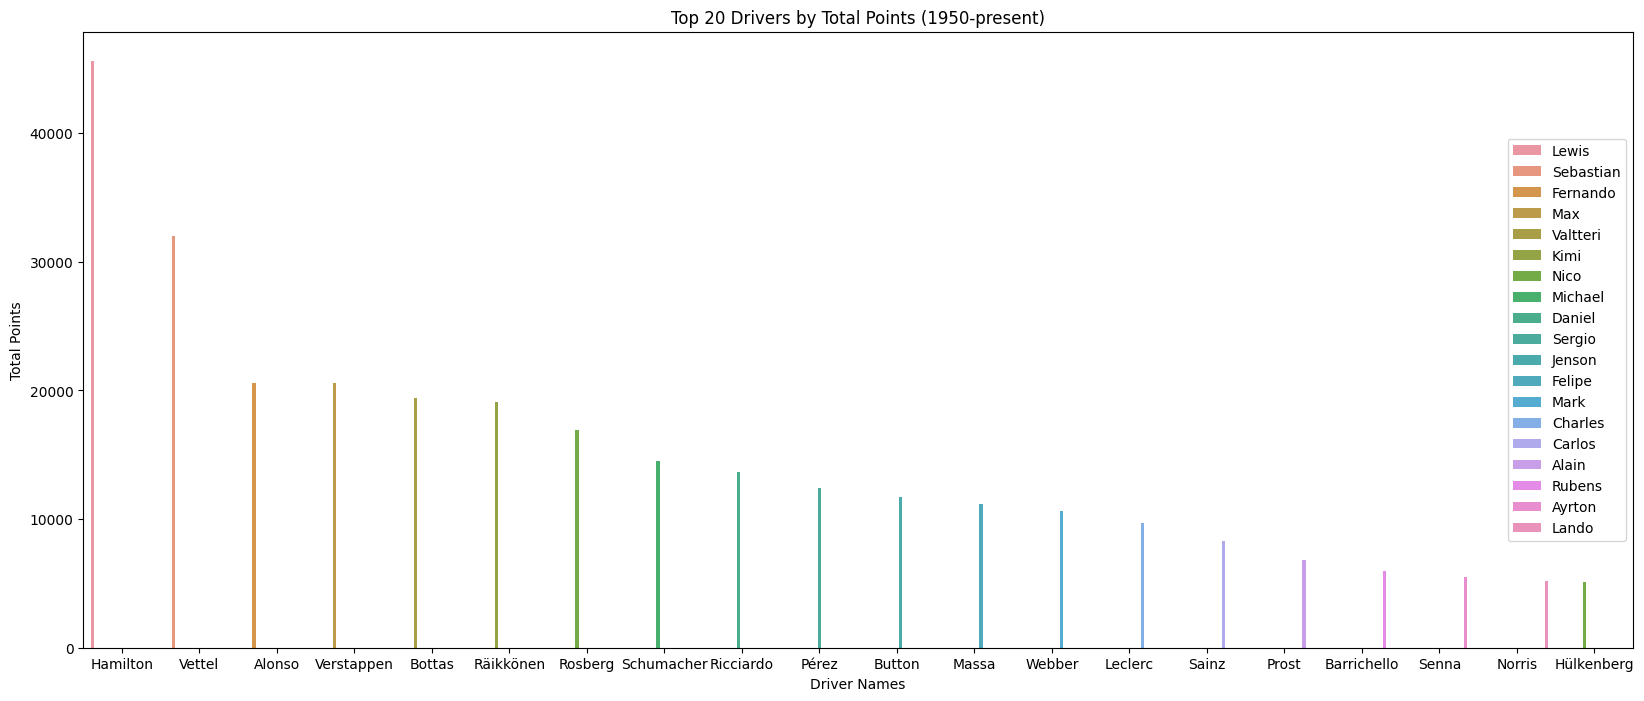

In [36]:


# Merge driver_standings and drivers datasets on driverId
driver_points_df = pd.merge(driver_standings_df, drivers_df, on='driverId')

# Group by driver name and sum up points
driver_points_total = driver_points_df.groupby(['forename', 'surname'])['points'].sum().reset_index()

# Sort by total points and get top 20 drivers
top_20_drivers = driver_points_total.sort_values(by='points', ascending=False)[:20]

# Create bar plot of top 20 drivers by points
plt.figure(figsize=(20, 8))
sns.barplot(data=top_20_drivers, x='surname', y='points', hue='forename')
plt.xlabel('Driver Names')
plt.ylabel('Total Points')
plt.title('Top 20 Drivers by Total Points (1950-present)')
plt.legend(loc='center right')
plt.show()


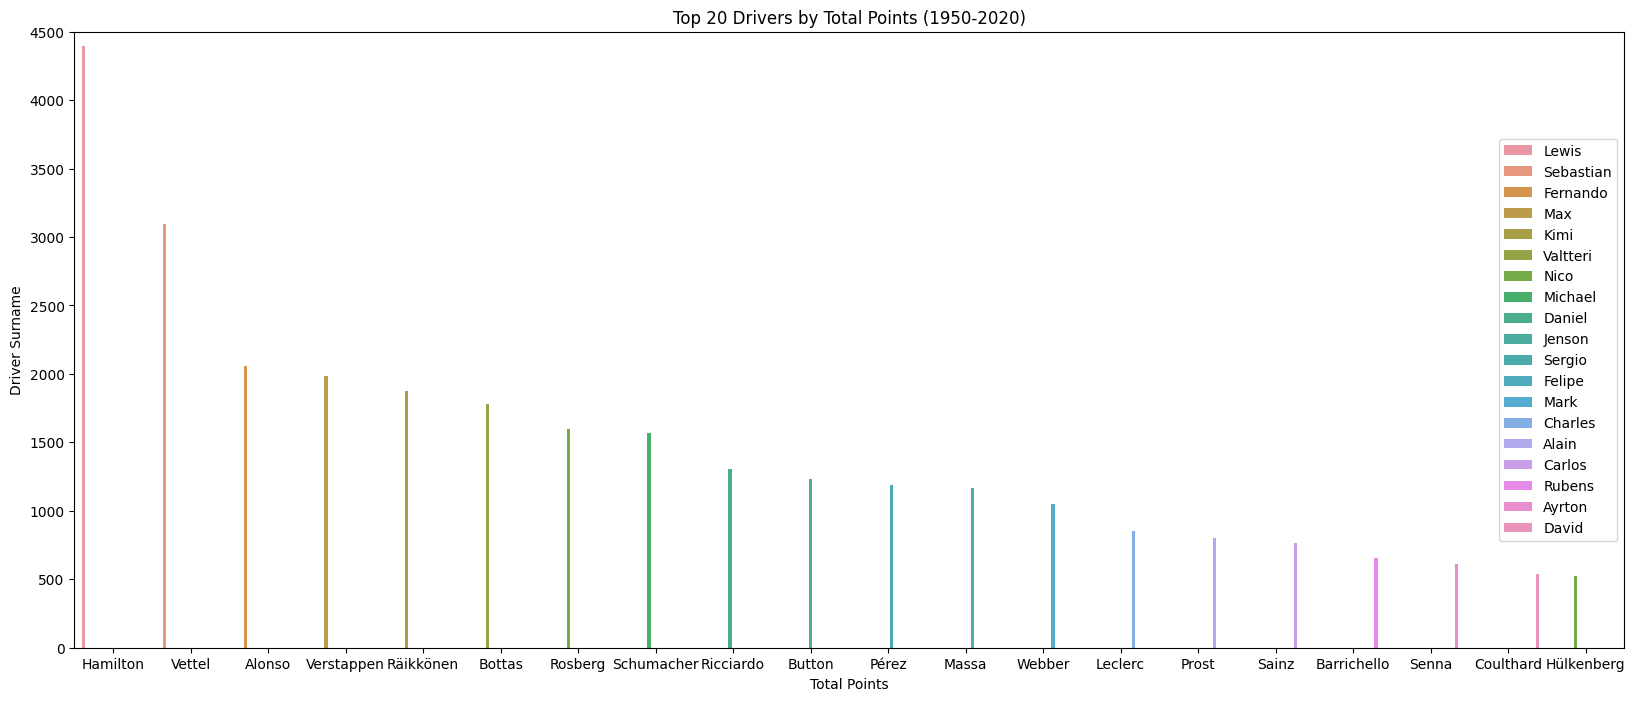

In [42]:
# Merge results and drivers datasets on driverId
driver_results_df = pd.merge(results_df, drivers_df, on='driverId')

# Group by driver name and sum up points
driver_points_total = driver_results_df.groupby(['forename', 'surname'])['points'].sum().reset_index()

# Sort by total points and get top 20 drivers
top_20_drivers = driver_points_total.sort_values(by='points', ascending=False)[:20]

# Create bar plot of top 20 drivers by points
plt.figure(figsize=(20, 8))
sns.barplot(data=top_20_drivers, x='surname', y='points', hue='forename')
plt.xlabel('Total Points')
plt.ylabel('Driver Surname')
plt.title('Top 20 Drivers by Total Points (1950-2020)')
plt.legend(loc='center right')

# Set y-axis limits
plt.ylim([0, 4500])

plt.show()


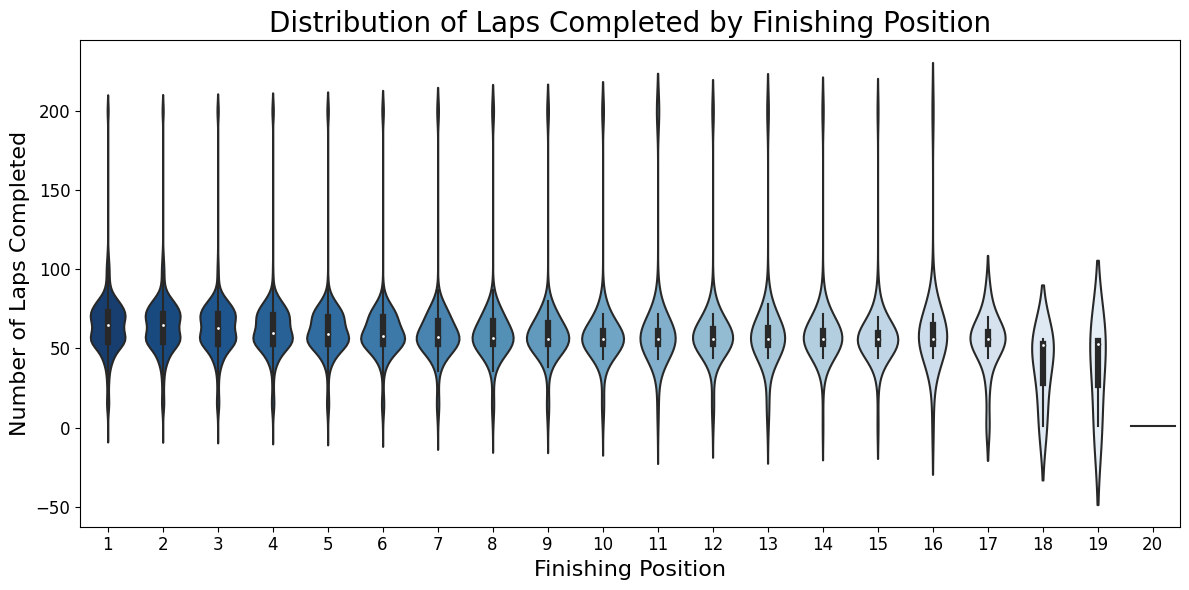

In [54]:
# Merge data
merged_df = pd.merge(races_df, results_df, on='raceId', how='inner')

# Filter for completed races
merged_df = merged_df.loc[merged_df['statusId'] == 1]

# Create violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='positionOrder', y='laps', data=merged_df, palette='Blues_r')
plt.title('Distribution of Laps Completed by Finishing Position', fontsize=20)
plt.xlabel('Finishing Position', fontsize=16)
plt.ylabel('Number of Laps Completed', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [59]:
# Load data
drivers_df = pd.read_csv('./f1-1950-2023/drivers.csv')
constructor_standings_df = pd.read_csv('./f1-1950-2023/constructor_standings.csv')
races_df = pd.read_csv('./f1-1950-2023/races.csv')

# Merge data
merged_df = pd.merge(drivers_df, constructor_standings_df, on=['driverId', 'raceId', 'constructorId'], how='inner')

# Get year of each race
races_df['year'] = pd.to_datetime(races_df['date']).dt.year

# Group by constructor and year
constructor_groups = merged_df.groupby(['constructorId', 'constructorRef', 'year']).agg({'driverRef': list}).reset_index()

# Create directed graph
G = nx.DiGraph()

# Add nodes
for constructor_id, constructor_ref, year in constructor_groups[['constructorId', 'constructorRef', 'year']].values:
    G.add_node(constructor_ref, year=year)

# Add edges
for _, row in constructor_groups.iterrows():
    constructor_ref = row['constructorRef']
    year = row['year']
    drivers = row['driverRef']
    for driver in drivers:
        G.add_edge(driver, constructor_ref, year=year)

# Draw network
plt.figure(figsize=(16, 10))
pos = nx.spring_layout(G, k=0.2)
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='#FDB813', alpha=0.8)
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=10, width=2, edge_color='#3C3C3D', alpha=0.8)
nx.draw_networkx_labels(G, pos, font_size=14, font_family='sans-serif', font_weight='bold', alpha=0.8)
plt.title('Network Visualization of F1 Constructors and Their Drivers', fontsize=20)
plt.axis('off')
plt.show()


KeyError: 'constructorId'